In [1]:
# import libraries
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from src import drop_column_using_vif_, show_vif_values

import imageio
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# loading the data
Dataframe_2018_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2018_normed.csv"))
Dataframe_2019_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2019_normed.csv"))
Dataframe_2020_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2020_normed.csv"))
Dataframe_2021_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2021_normed.csv"))
Dataframe_2022_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2022_normed.csv"))

In [3]:
Merged_dataframe_2018_2022 = pd.read_csv(os.path.join("data","Regression2018_2022","Merged2018_2022.csv"))

In [4]:
# define the dict
dataframes_normed = {'Dataframe_2018_normed': Dataframe_2018_normed,
                     'Dataframe_2019_normed': Dataframe_2019_normed,
                     'Dataframe_2020_normed': Dataframe_2020_normed,
                     'Dataframe_2021_normed': Dataframe_2021_normed,
                     'Dataframe_2022_normed': Dataframe_2022_normed  
}

In [5]:
# Create a yeas' list
years = ['2018', '2019', '2020', '2021', '2022']

**EDA data distribution**

In [6]:
Dataframe_2018_normed_cormatrix = Dataframe_2018_normed[['Connections_2018', 'Decent_Home_2018', 'Safety_2018',
       'Environment_2018', 'Employment_2018', 'Finance_Secure_2018','Healthy_2018']]

Year: 2018
Descriptive Statistics


,Finance_Secure_2018,Environment_2018,Employment_2018,Healthy_2018,Safety_2018,Decent_Home_2018,Connections_2018,PriceDiff_2018
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,3.906597e-15,6.938894e-17,-3.677614e-16,1.290634e-15,-1.768030e-14,-1.387779e-16,1.387779e-17,0.002865
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.031618
min,-1.994027e+00,-1.412686e+00,-2.047847e+00,-1.607469e+00,-3.301918e+00,-2.302293e+00,-1.987888e+00,-2.059226
25%,-6.128478e-01,-7.922516e-01,-6.579564e-01,-7.410064e-01,-3.971380e-01,-5.956896e-01,-6.908264e-01,-0.421507
50%,-1.039923e-01,-2.049198e-02,1.580440e-01,-4.512828e-03,-3.404040e-02,2.226819e-01,3.806594e-01,-0.216153
75%,6.633295e-01,5.721992e-01,6.960663e-01,5.875703e-01,6.921547e-01,5.919470e-01,9.445994e-01,0.544982
max,1.818351e+00,2.430980e+00,1.825913e+00,2.580435e+00,1.418350e+00,1.899345e+00,1.395751e+00,2.064189


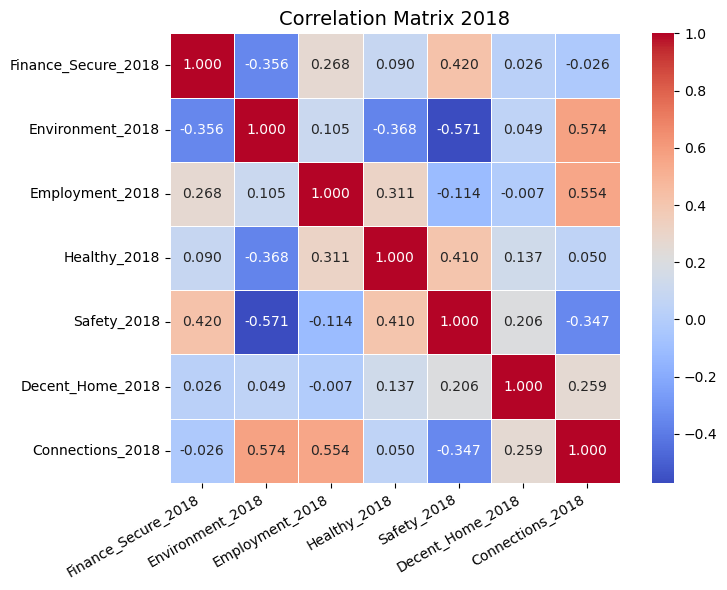

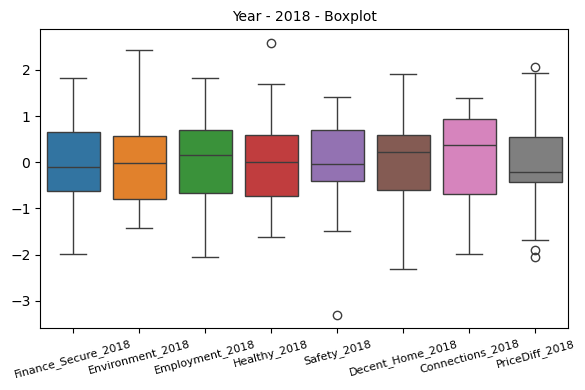

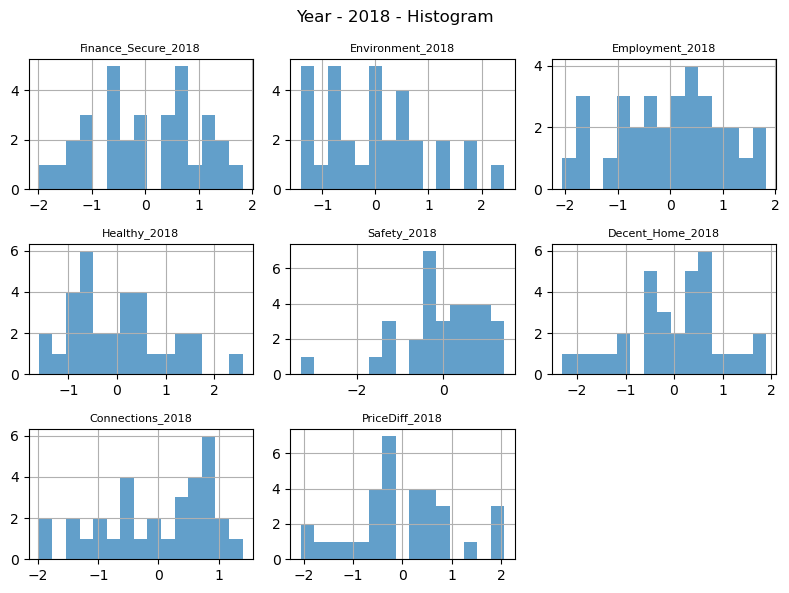

Year: 2019
Descriptive Statistics


,Finance_Secure_2019,Environment_2019,Employment_2019,Healthy_2019,Safety_2019,Decent_Home_2019,Connections_2019,PriceDiff_2019
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,2.053913e-15,2.151057e-16,-2.116363e-15,1.609823e-15,4.254236e-14,1.471046e-15,4.510281e-17,-0.001326
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.031725
min,-1.962225e+00,-1.449983e+00,-1.884051e+00,-1.502220e+00,-3.732283e+00,-2.094937e+00,-2.035919e+00,-3.420771
25%,-7.931581e-01,-8.257376e-01,-7.341776e-01,-8.224981e-01,-5.068532e-01,-6.861676e-01,-5.773503e-01,-0.324480
50%,1.605544e-01,-1.349063e-01,-4.234493e-02,-2.128509e-01,-4.607757e-02,8.136855e-02,2.734817e-01,0.008736
75%,5.758809e-01,5.476017e-01,8.451094e-01,8.522797e-01,6.911635e-01,6.222063e-01,8.812188e-01,0.414960
max,2.006450e+00,2.977996e+00,1.627596e+00,1.917410e+00,1.428405e+00,1.907910e+00,1.610503e+00,1.749698


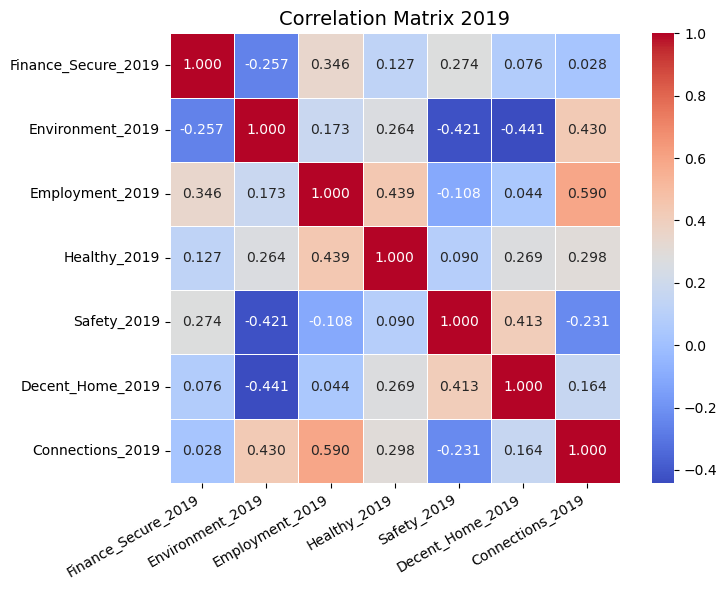

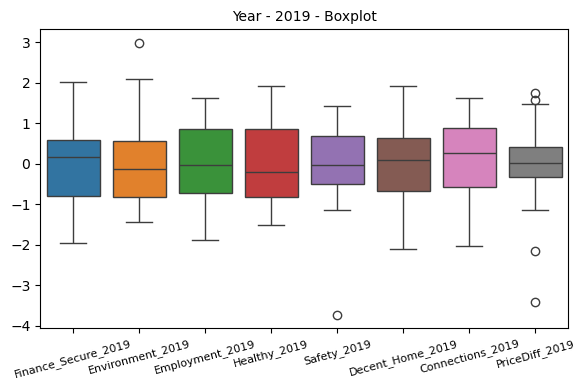

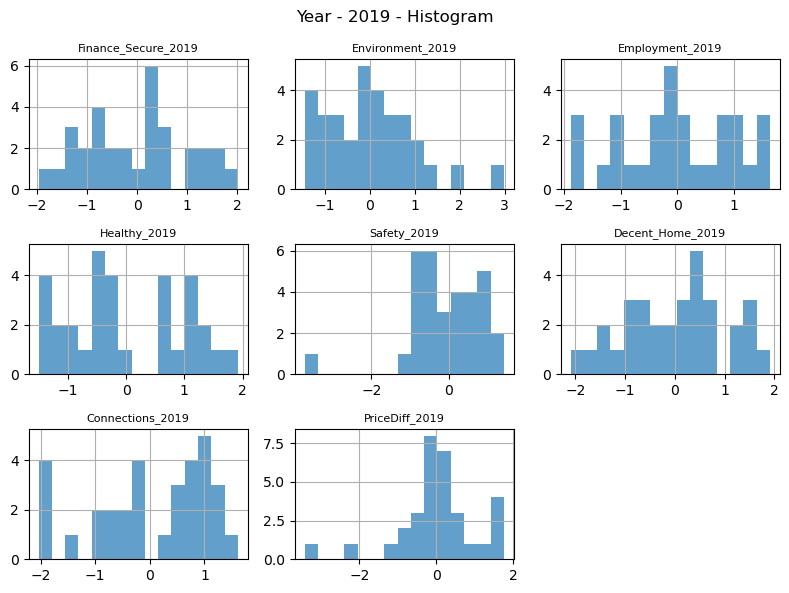

Year: 2020
Descriptive Statistics


,Finance_Secure_2020,Environment_2020,Employment_2020,Healthy_2020,Safety_2020,Decent_Home_2020,Connections_2020,PriceDiff_2020
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,-1.578598e-15,6.626644e-16,2.144118e-15,8.396062e-16,-1.719458e-14,-4.371503e-16,-1.734723e-17,-0.005017
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.031338
min,-2.620558e+00,-1.299109e+00,-2.304341e+00,-2.805120e+00,-4.019249e+00,-2.577436e+00,-3.613707e+00,-2.286897
25%,-7.687075e-01,-6.290609e-01,-5.708582e-01,-3.269371e-01,-4.955238e-01,-5.004193e-01,-5.759148e-01,-0.765376
50%,9.717474e-02,-1.643043e-01,-1.957771e-01,1.961622e-02,2.092212e-01,3.179786e-01,2.341631e-01,-0.069305
75%,6.976040e-01,4.373132e-01,8.534362e-01,7.323391e-01,5.615936e-01,5.041124e-01,6.898320e-01,0.756145
max,1.475002e+00,3.262919e+00,1.892512e+00,1.458139e+00,1.618711e+00,1.866139e+00,1.044241e+00,1.908780


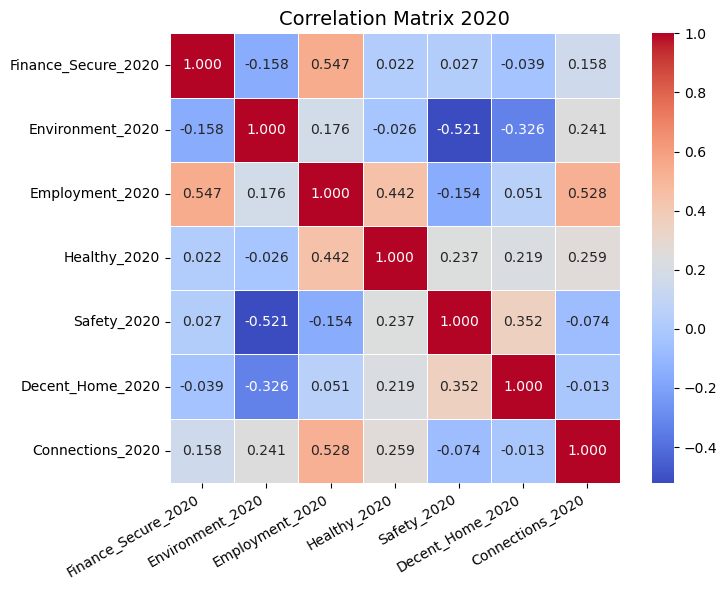

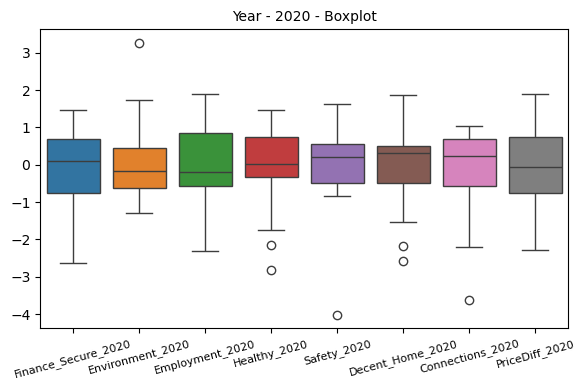

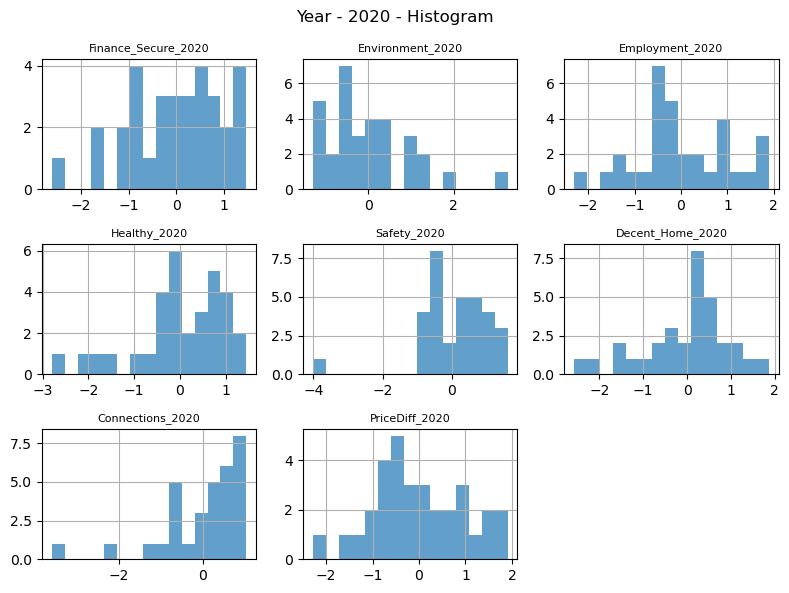

Year: 2021
Descriptive Statistics


,Finance_Secure_2021,Environment_2021,Employment_2021,Healthy_2021,Safety_2021,Decent_Home_2021,Connections_2021,PriceDiff_2021
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,9.714451e-17,-2.775558e-16,1.387779e-16,1.401657e-15,-4.662937e-15,-5.412337e-16,-2.775558e-17,0.000218
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.031753
min,-2.541024e+00,-1.428693e+00,-1.855792e+00,-2.391730e+00,-2.997584e+00,-2.206536e+00,-2.810369e+00,-2.382698
25%,-6.464301e-01,-7.209733e-01,-9.187230e-01,-5.963954e-01,-5.077875e-01,-3.082522e-01,-7.664642e-01,-0.624667
50%,2.661771e-01,-1.669901e-01,6.350620e-02,1.414133e-01,-3.767456e-01,2.094615e-01,5.109761e-02,0.173563
75%,6.877909e-01,5.142236e-01,8.086456e-01,7.869960e-01,8.026318e-01,6.221318e-01,5.620737e-01,0.731843
max,1.429618e+00,3.236428e+00,1.621525e+00,1.494063e+00,1.719925e+00,1.795116e+00,1.277440e+00,1.522510


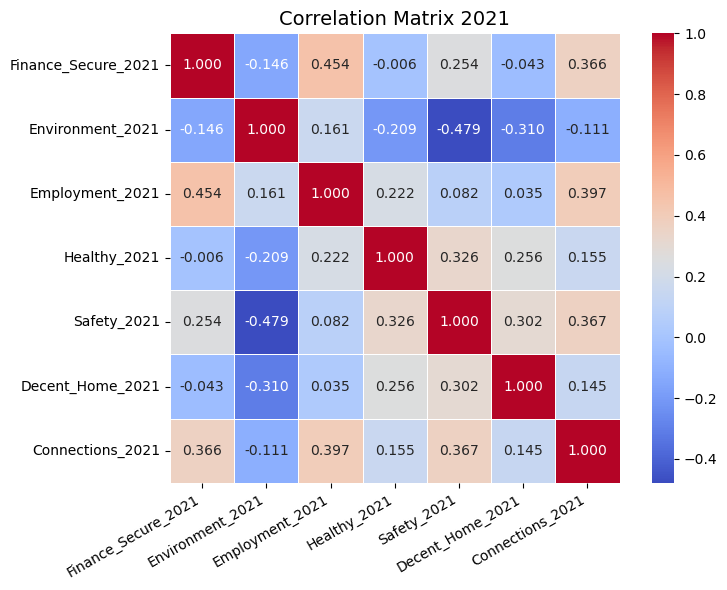

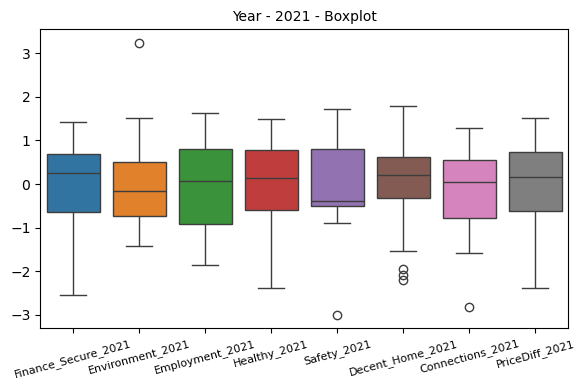

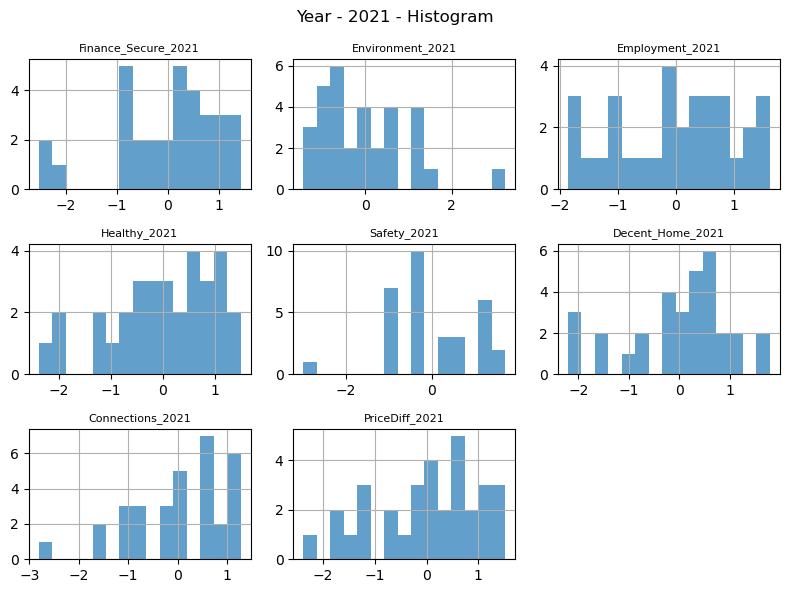

Year: 2022
Descriptive Statistics


,Finance_Secure_2022,Environment_2022,Employment_2022,Healthy_2022,Safety_2022,Decent_Home_2022,Connections_2022,PriceDiff_2022
count,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,-2.525757e-15,3.747003e-16,0.000000,8.881784e-16,3.025358e-15,1.151856e-15,-3.469447e-18,-0.002718
std,1.016001e+00,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.031632
min,-2.725097e+00,-1.564810e+00,-2.514763,-1.528861e+00,-4.107958e+00,-2.428678e+00,-3.128634e+00,-2.285493
25%,-6.168670e-01,-7.665951e-01,-0.717831,-9.423839e-01,-3.907312e-01,-5.626433e-01,-3.965874e-01,-0.831881
50%,1.697859e-01,-6.956271e-02,0.098957,-1.856390e-01,-5.280152e-02,1.220517e-01,4.406526e-02,0.026958
75%,9.039953e-01,7.342730e-01,0.683274,9.589377e-01,6.230579e-01,6.572711e-01,7.491095e-01,0.620066
max,1.449408e+00,3.201992e+00,1.632005,1.498118e+00,1.636847e+00,1.544482e+00,1.806676e+00,2.362734


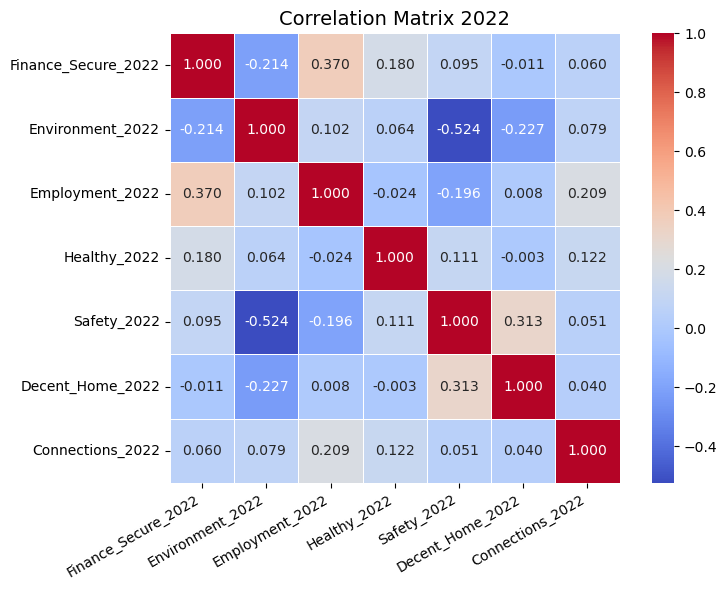

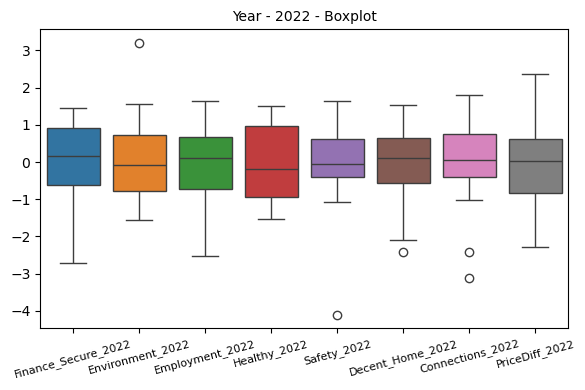

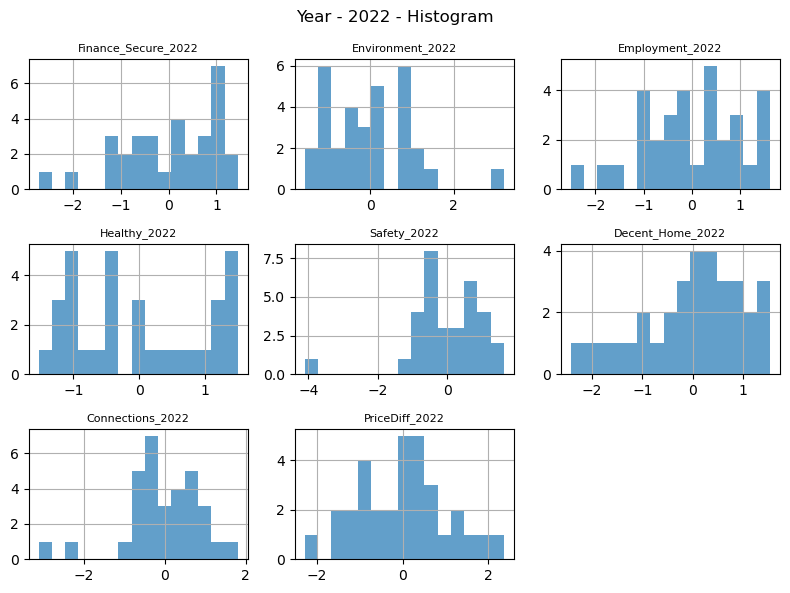

In [9]:

# statistic every year in dataframes_normed
# make the directory for saving the output files and images

for year in years:
    print(f"Year: {year}")
    print("Descriptive Statistics")
    

    # define and columns for analysis
    columns_to_analyze = [f'Finance_Secure_{year}', f'Environment_{year}', f'Employment_{year}', 
                      f'Healthy_{year}', f'Safety_{year}', f'Decent_Home_{year}', f'Connections_{year}', f'PriceDiff_{year}']
    
    #save the Descriptive Statistics to local csv file
    description = dataframes_normed[f'Dataframe_{year}_normed'][columns_to_analyze].describe()
    description.to_csv(os.path.join("AnalysisResult", f'Statistical_Description_{year}.csv'))

    display(dataframes_normed[f'Dataframe_{year}_normed'][columns_to_analyze].describe())  # show the descriptive statistics


    # plot the correlation matrix
    columns_for_correlation = [f'Finance_Secure_{year}', f'Environment_{year}', f'Employment_{year}', 
                      f'Healthy_{year}', f'Safety_{year}', f'Decent_Home_{year}', f'Connections_{year}']

    corr = dataframes_normed[f'Dataframe_{year}_normed'][columns_for_correlation].corr()


    # Set the size of the figure
    f = plt.figure(figsize=(8, 6))

    # Create the heatmap, while ensuring the aspect ratio is equal
    # so the heatmap cells are square
    ax = sns.heatmap(corr, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='coolwarm', annot_kws={"size": 10})

    # Set the title of the heatmap
    plt.title(f'Correlation Matrix {year}', fontsize=14)

    # Rotate the x and y axis labels for better readability
    plt.xticks(rotation=30, ha='right', fontsize=10)
    plt.yticks(ha='right', fontsize=10)

    plt.tight_layout()
    # save the fig
    plt.savefig(os.path.join("images", f'CorrelationMatrix_{year}.png'),bbox_inches='tight')
    # Show the plot
    plt.show()




    # plot the boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=dataframes_normed[f'Dataframe_{year}_normed'][columns_to_analyze])
    plt.title(f"Year - {year} - Boxplot", fontsize=10)
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()
    plt.savefig(os.path.join("images", f'Boxplot_{year}.png'), bbox_inches='tight')
    plt.show()

      

    # plot histogram
    axes = dataframes_normed[f'Dataframe_{year}_normed'][columns_to_analyze].hist(figsize=(8, 6), bins=15, alpha=0.7, rwidth=1)

    # set subtitle's size
    for ax in axes.flatten():
        ax.set_title(ax.get_title(), fontsize=10)

    plt.suptitle(f"Year - {year} - Histogram", fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join("images", f'Histogram_{year}.png'), bbox_inches='tight')
    plt.show()
    
